In [1]:
# Importing the necessary libraries

import json
import matplotlib.pyplot as plt
import os

In [3]:
# --- Config ---
output_dir = "ckpt/neurips.pt/Tg/Tg3/checkpoint-7150"  # Change to your checkpoint/output directory
state_file = os.path.join(output_dir, "trainer_state.json")

In [4]:
# --- Load Trainer State ---
with open(state_file, "r") as f:
    state = json.load(f)

In [5]:
# --- Extract Loss Data ---
train_loss = []
eval_loss = []
steps = []

for log in state["log_history"]:
    if "loss" in log:
        train_loss.append(log["loss"])
        steps.append(log["step"])
    if "eval_loss" in log:
        eval_loss.append(log["eval_loss"])

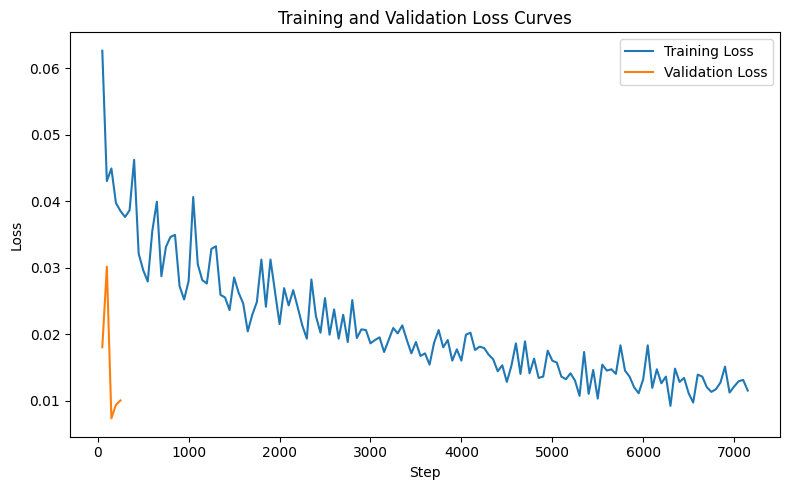

In [6]:
# --- Plot ---
plt.figure(figsize=(8, 5))
plt.plot(steps[:len(train_loss)], train_loss, label="Training Loss")
plt.plot(steps[:len(eval_loss)], eval_loss, label="Validation Loss")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend()
plt.tight_layout()
plt.show()